<a href="https://colab.research.google.com/github/Gaurav2912/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


![](https://miro.medium.com/max/828/0*bepdYypteRGfqJYP.jpg)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left" hspace="10px" vspace="10px" width="55" height="65" ></p>



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Roadmap**

![](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/bike_sharing_34496d0e96.png)

In [1]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import numpy as np
from numpy import math
import time
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 

import warnings
warnings.filterwarnings("ignore")

In [3]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [4]:
# Read the csv file
path = "/content/drive/MyDrive/Colab Notebooks/capstone project/Bike Sharing Demand Prediction/"
df = pd.read_csv(path + "SeoulBikeData.csv",encoding= 'unicode_escape')

In [5]:
# Head of the data frame
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# tail of the data frame
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Check the dimension of data drame
df.shape

(8760, 14)

This dataset contains 8760 rows and 14 columns.

----
**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data.


In [9]:
# conferming null values with diffretnt method 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

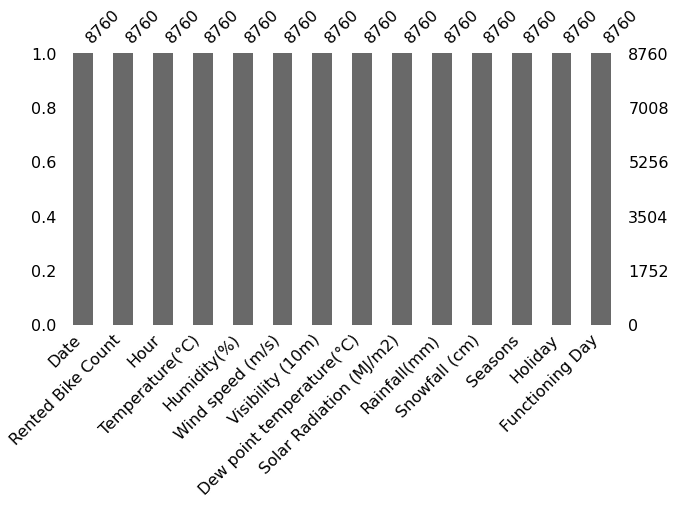

In [10]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df, figsize= (10,5));

In [11]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


* From above we can see that, there is not a single missing value anywhere in Data Frame.
* Not a single duplicate entry in data frame.
<br/>

# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday


In [12]:
# Convert it to datetime object
df['Date'] =  pd.to_datetime(df['Date'])

def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df['Year'] = df[col].dt.year
  df['Month'] = df[col].dt.month
  df['Day'] = df[col].dt.day
  df['Weekday'] = df[col].dt.weekday

# creating datepart
add_dateparts(df, 'Date')

# Now it is time to drop the feature
df.drop("Date",axis= 1, inplace=True)

# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

In [13]:
# Checking for unique values 
df.nunique().sort_values()

Year                            2
Functioning Day                 2
Holiday                         2
Seasons                         4
Weekday                         7
Month                          12
Hour                           24
Day                            31
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

# Exploratory Data Analysis

---
Now I will divide this into two parts, once for the count plot and the other for the histogram.

The count plot will have those features which have less than 32 unique values.

In [14]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', '#FF5959'])
plt.rcParams['font.size'] = 14

In [15]:
# histogram
fig = px.histogram(df, x='Rented Bike Count', marginal="box", 
                   title="Histogram of Rented Bike Count")

fig.show()

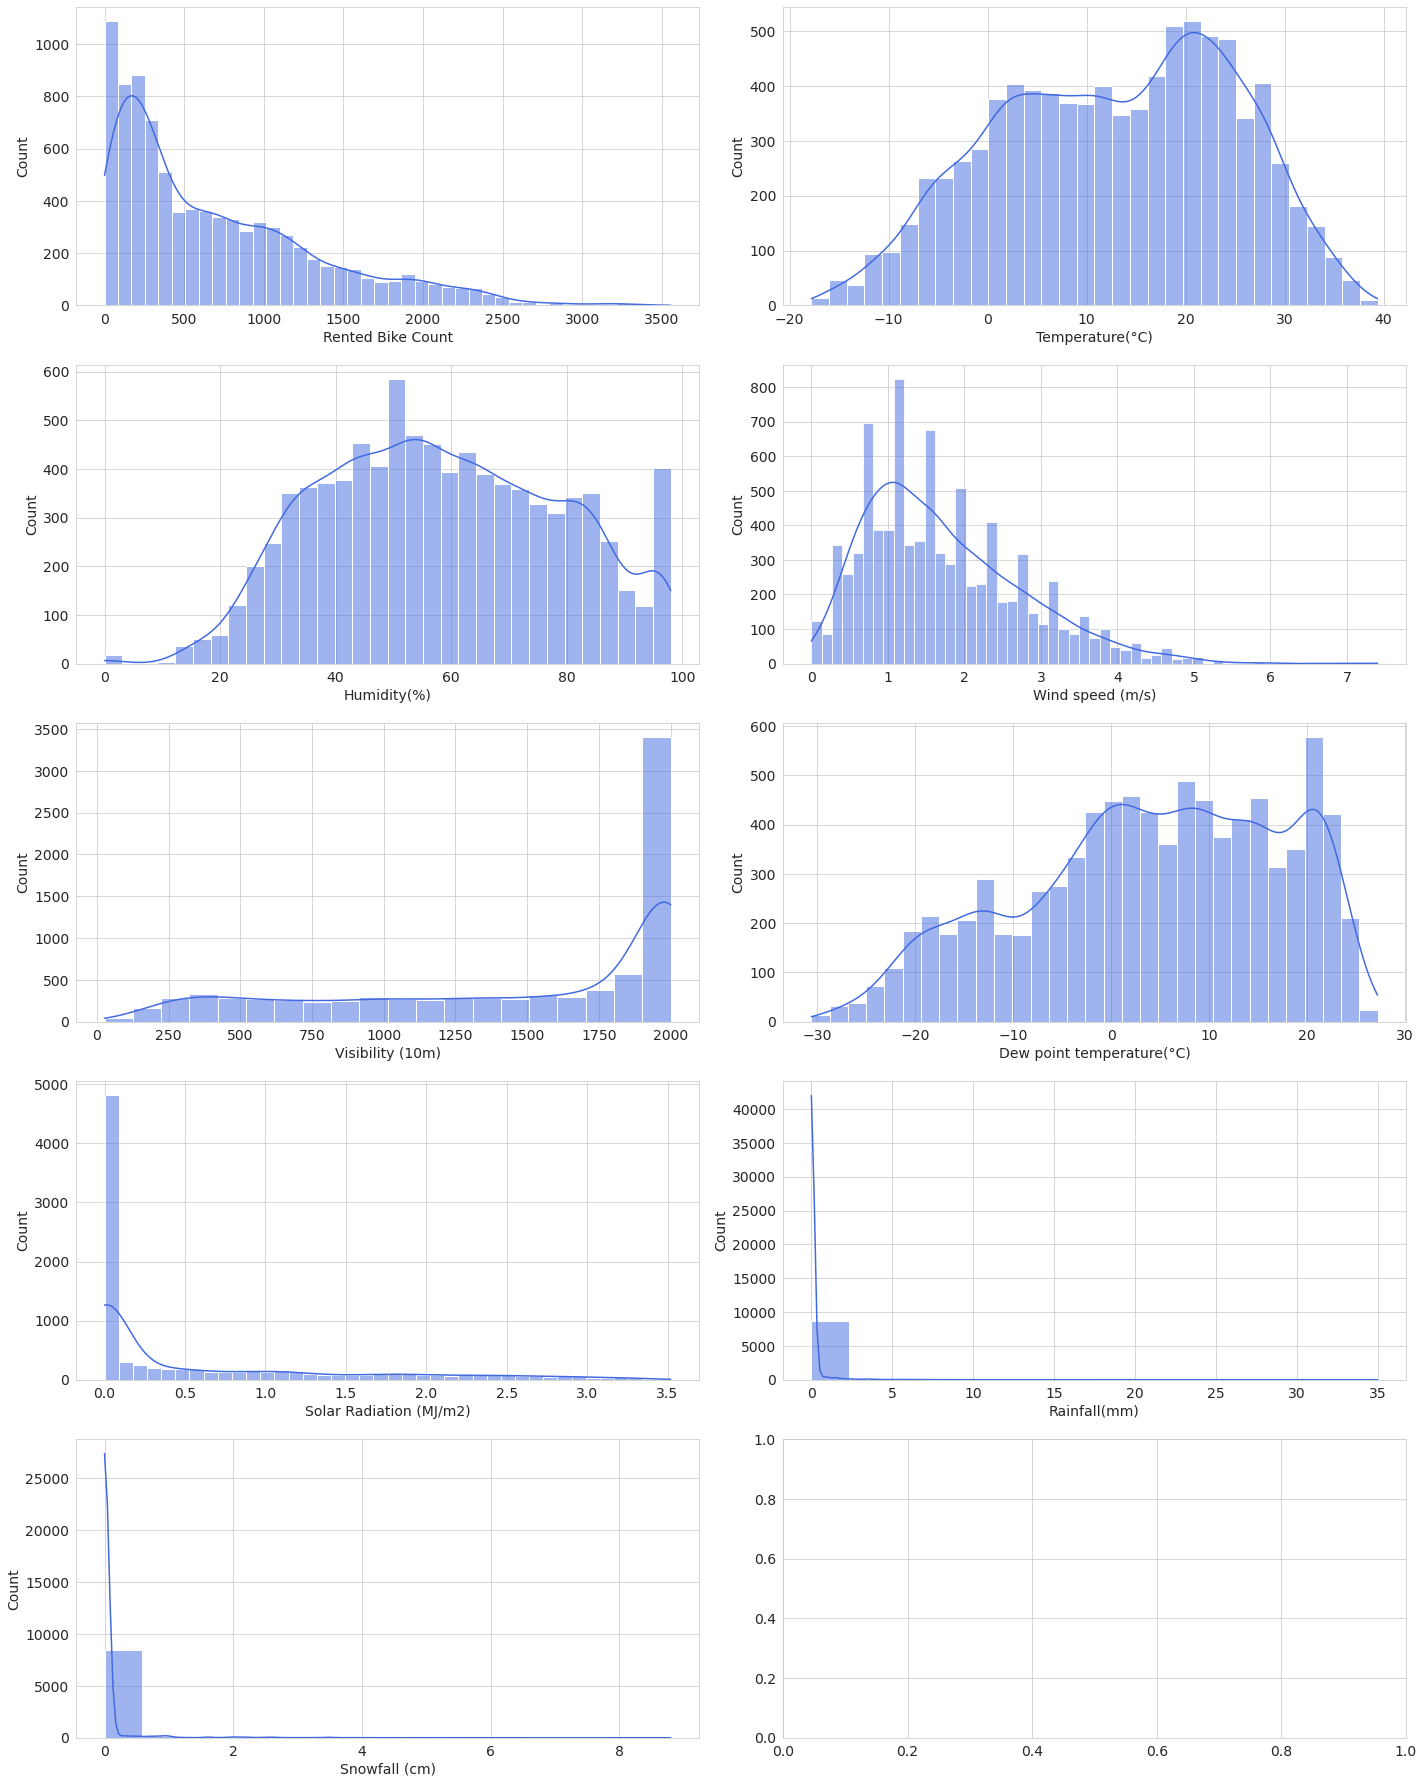

In [16]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(20, 25), nrows= 5, ncols= 2)

# feature that have grater than 32 unique values
features_hist = [col for col in df.columns  if len(df[col].unique()) > 32]

for i, feature in enumerate(features_hist):
  ax = axes[i//2, i % 2]
  sns.histplot(data= df, x = feature, ax = ax, kde= True)

plt.tight_layout();

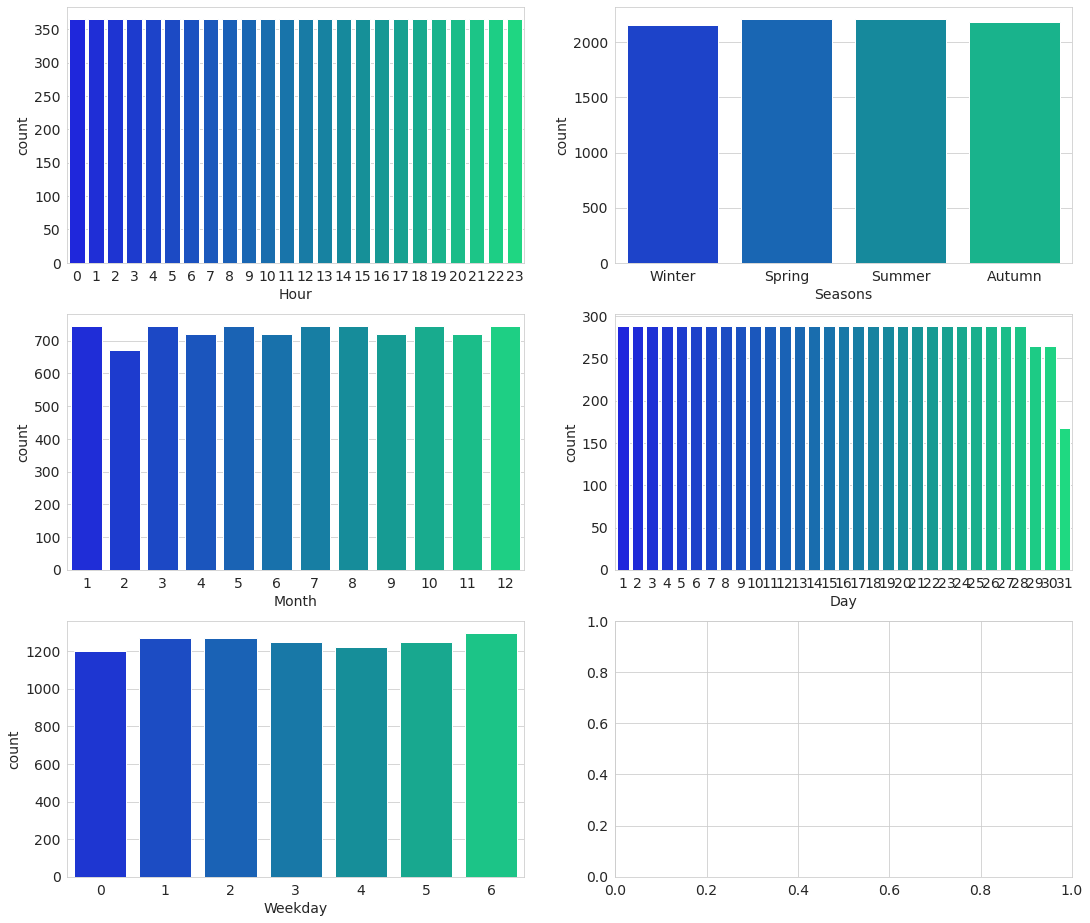

In [17]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(18, 16), nrows= 3, ncols= 2)

# non binary feature that have less than 32 unique values
features_cplot = [col for col in df.columns if  2 < len(df[col].unique()) < 32]

for i, feature in enumerate(features_cplot):
  ax = axes[i//2, i % 2]
  sns.countplot(data= df, x= feature, ax= ax, palette= 'winter')

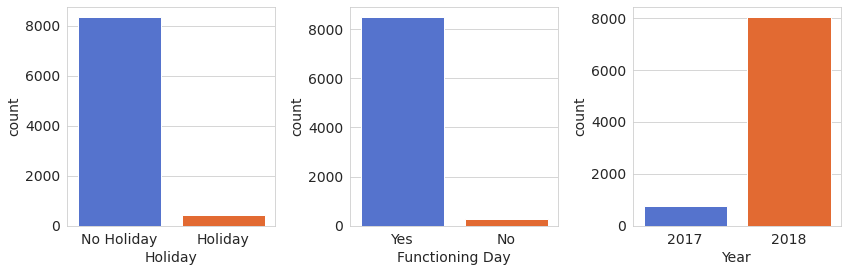

In [18]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(12,4), nrows= 1, ncols= 3)

# binary feature 
features_cplot_bin = [col for col in df.columns  if len(df[col].unique()) < 3]

for i, feature in enumerate(features_cplot_bin):
  sns.countplot(data= df, x = feature, ax = axes[i])

plt.tight_layout();

# Observation 4 : Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.


In [19]:
# converting Year feature from int data type to string format
df["Year"]= df["Year"].astype(str)

In [20]:
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)

In [21]:
# to create dummy variables, drop_firt is for one hot-encoding
df_objs_encoded = pd.get_dummies(df_objs, drop_first= True)

# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final = pd.concat([df_nums, df_objs_encoded], axis= 1)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int64  
 11  Day                        8760 non-null   int64  
 12  Weekday                    8760 non-null   int64  
 13  Seasons_Spring             8760 non-null   uint8

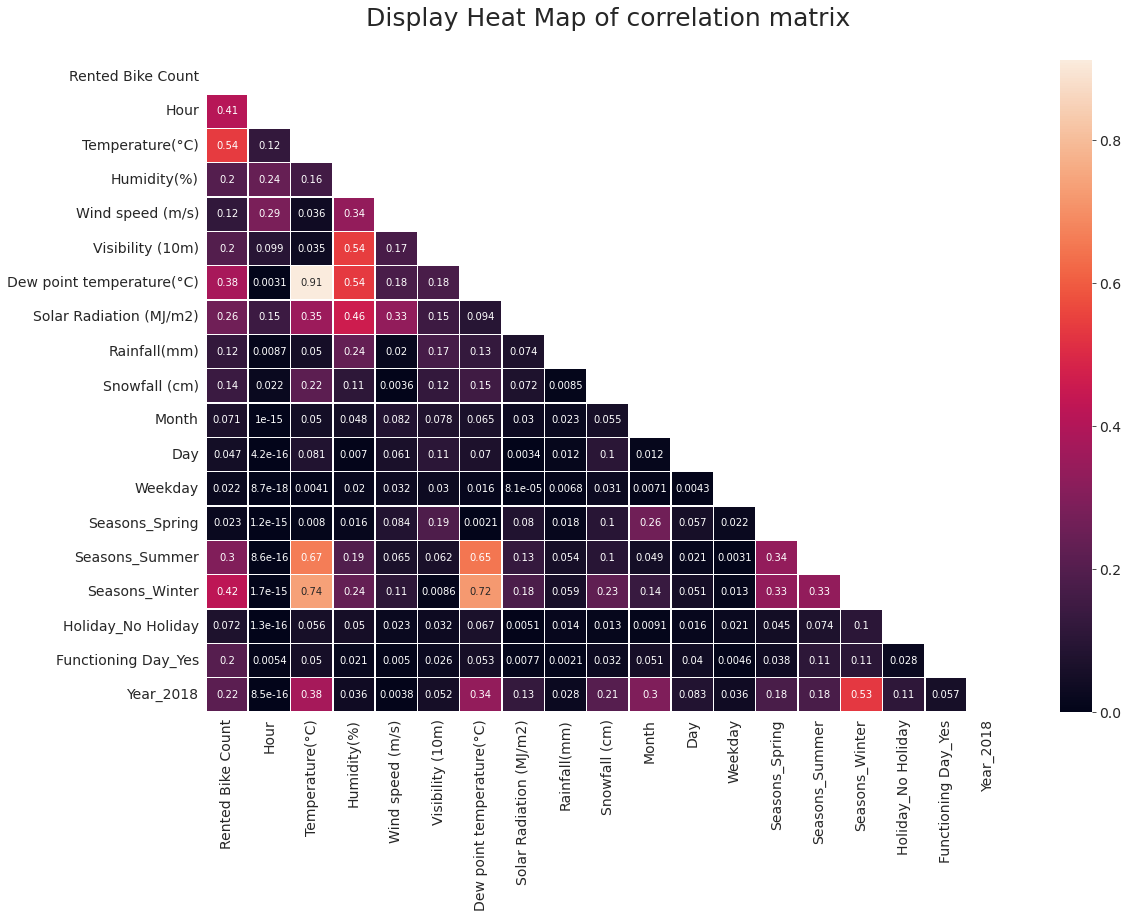

In [23]:
# for finding correlation matrix , using .corr() method
corr_df = df_final.corr()

# Creates a blanck canvas
plt.figure(figsize= (18,12))

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(abs(corr_df), annot= True, annot_kws={"size":10}, mask= mask, linewidth= .5)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

In [24]:
# correlation with target variable
corr_to_label  = corr_df['Rented Bike Count'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self correlation), so we ignoring it. 
corr_to_label  

Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Year_2018                    0.215162
Functioning Day_Yes          0.203943
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Holiday_No Holiday           0.072338
Month                        0.070861
Day                          0.046849
Seasons_Spring               0.022888
Weekday                     -0.021577
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Seasons_Winter              -0.424925
Name: Rented Bike Count, dtype: float64

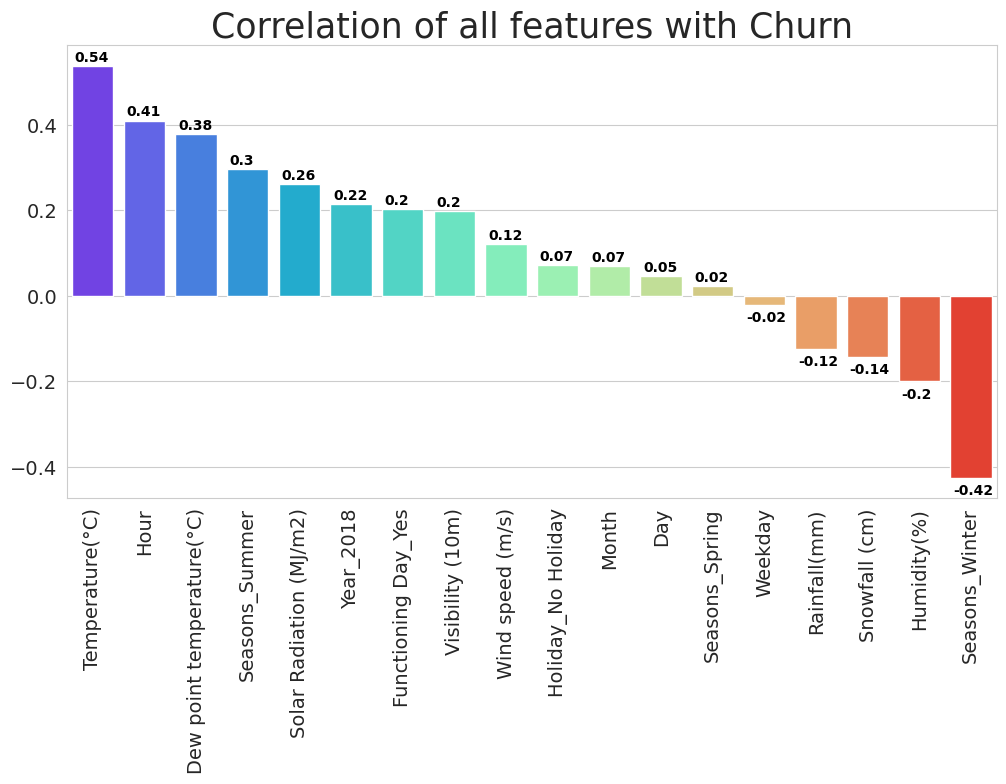

In [25]:
# Creates a blanck canvas
plt.figure(figsize=(12,6), dpi= 100)

# bar plot for correlation value of all features with target variable
sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')

#  add title
plt.title("Correlation of all features with Churn", fontsize= 25)

# writing text on plot
for i in range(len(corr_to_label)):

  # positive values are on top of bar 
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')
  
  # negative values are just below the bar
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]- 0.04,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black', weight='bold')

# rotating test on x-axis  
plt.xticks(rotation=90);

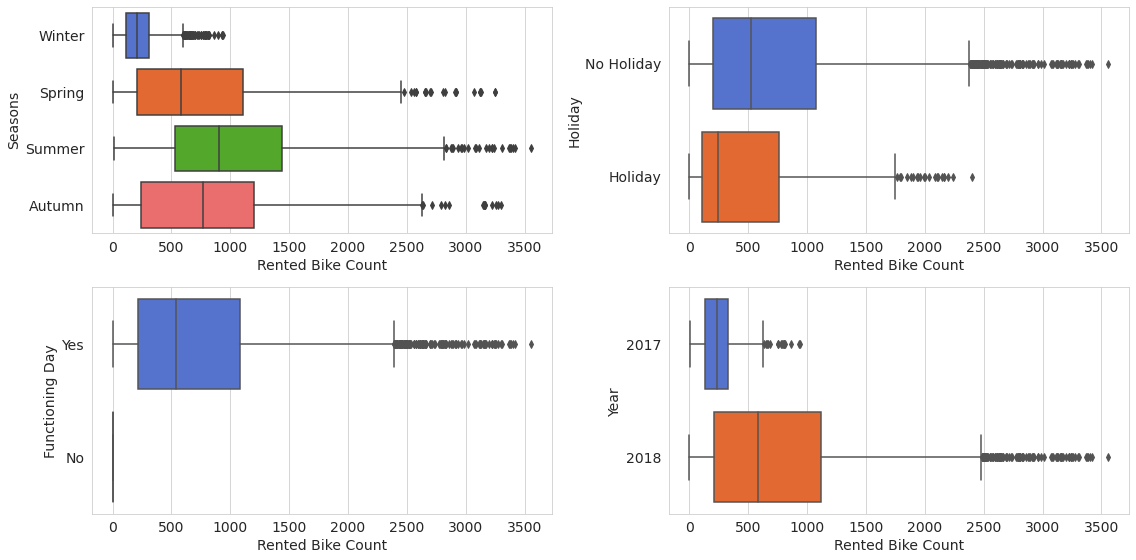

In [26]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(16,8), nrows= 2, ncols= 2)

for ind, feature in enumerate(df_objs.columns):
  ax = axes[ind // 2, ind % 2]
  sns.boxplot(data= df, y= feature, x= 'Rented Bike Count', ax= ax, orient= 'h')

plt.tight_layout();

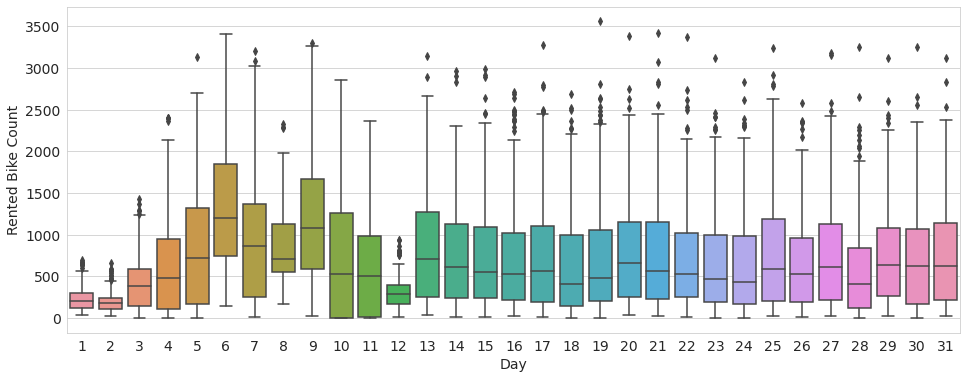

In [42]:
plt.figure(figsize= (16,6))
sns.boxplot(data= df, x= 'Day', y= 'Rented Bike Count' );

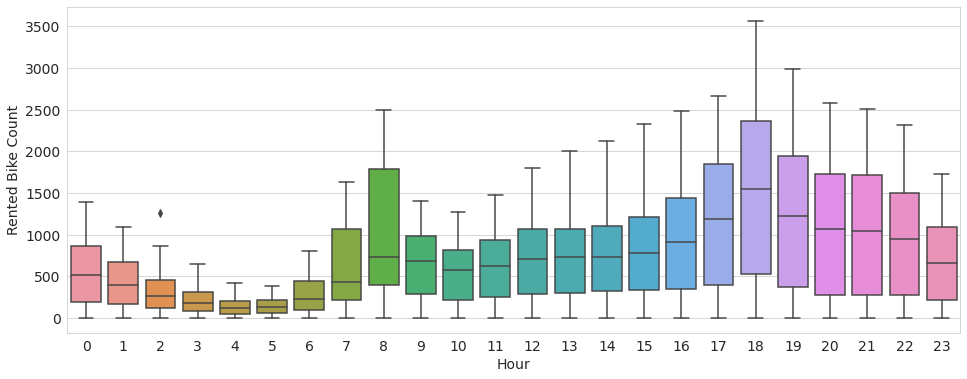

In [43]:
plt.figure(figsize= (16,6))
sns.boxplot(data= df, x= 'Hour', y= 'Rented Bike Count');

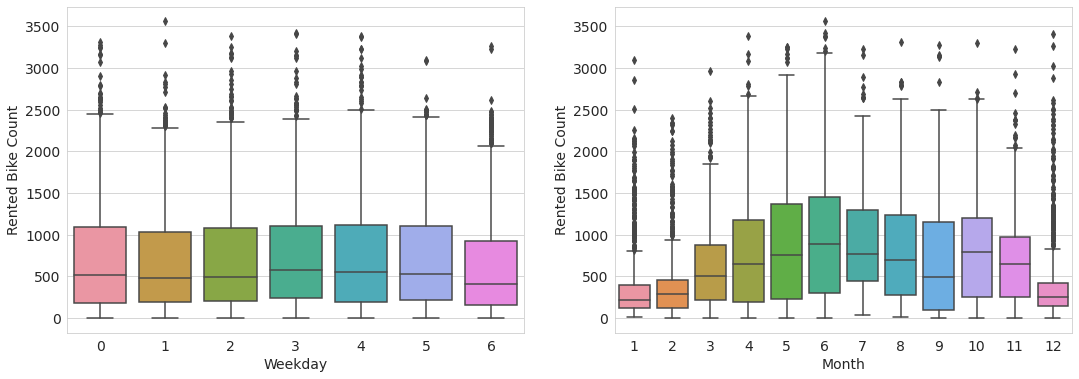

In [44]:
fig, axes = plt.subplots(figsize=(18,6), nrows= 1, ncols= 2)

sns.boxplot(data= df, x= 'Weekday', y= 'Rented Bike Count', ax= axes[0])
sns.boxplot(data= df, x= 'Month', y= 'Rented Bike Count' , ax= axes[1])

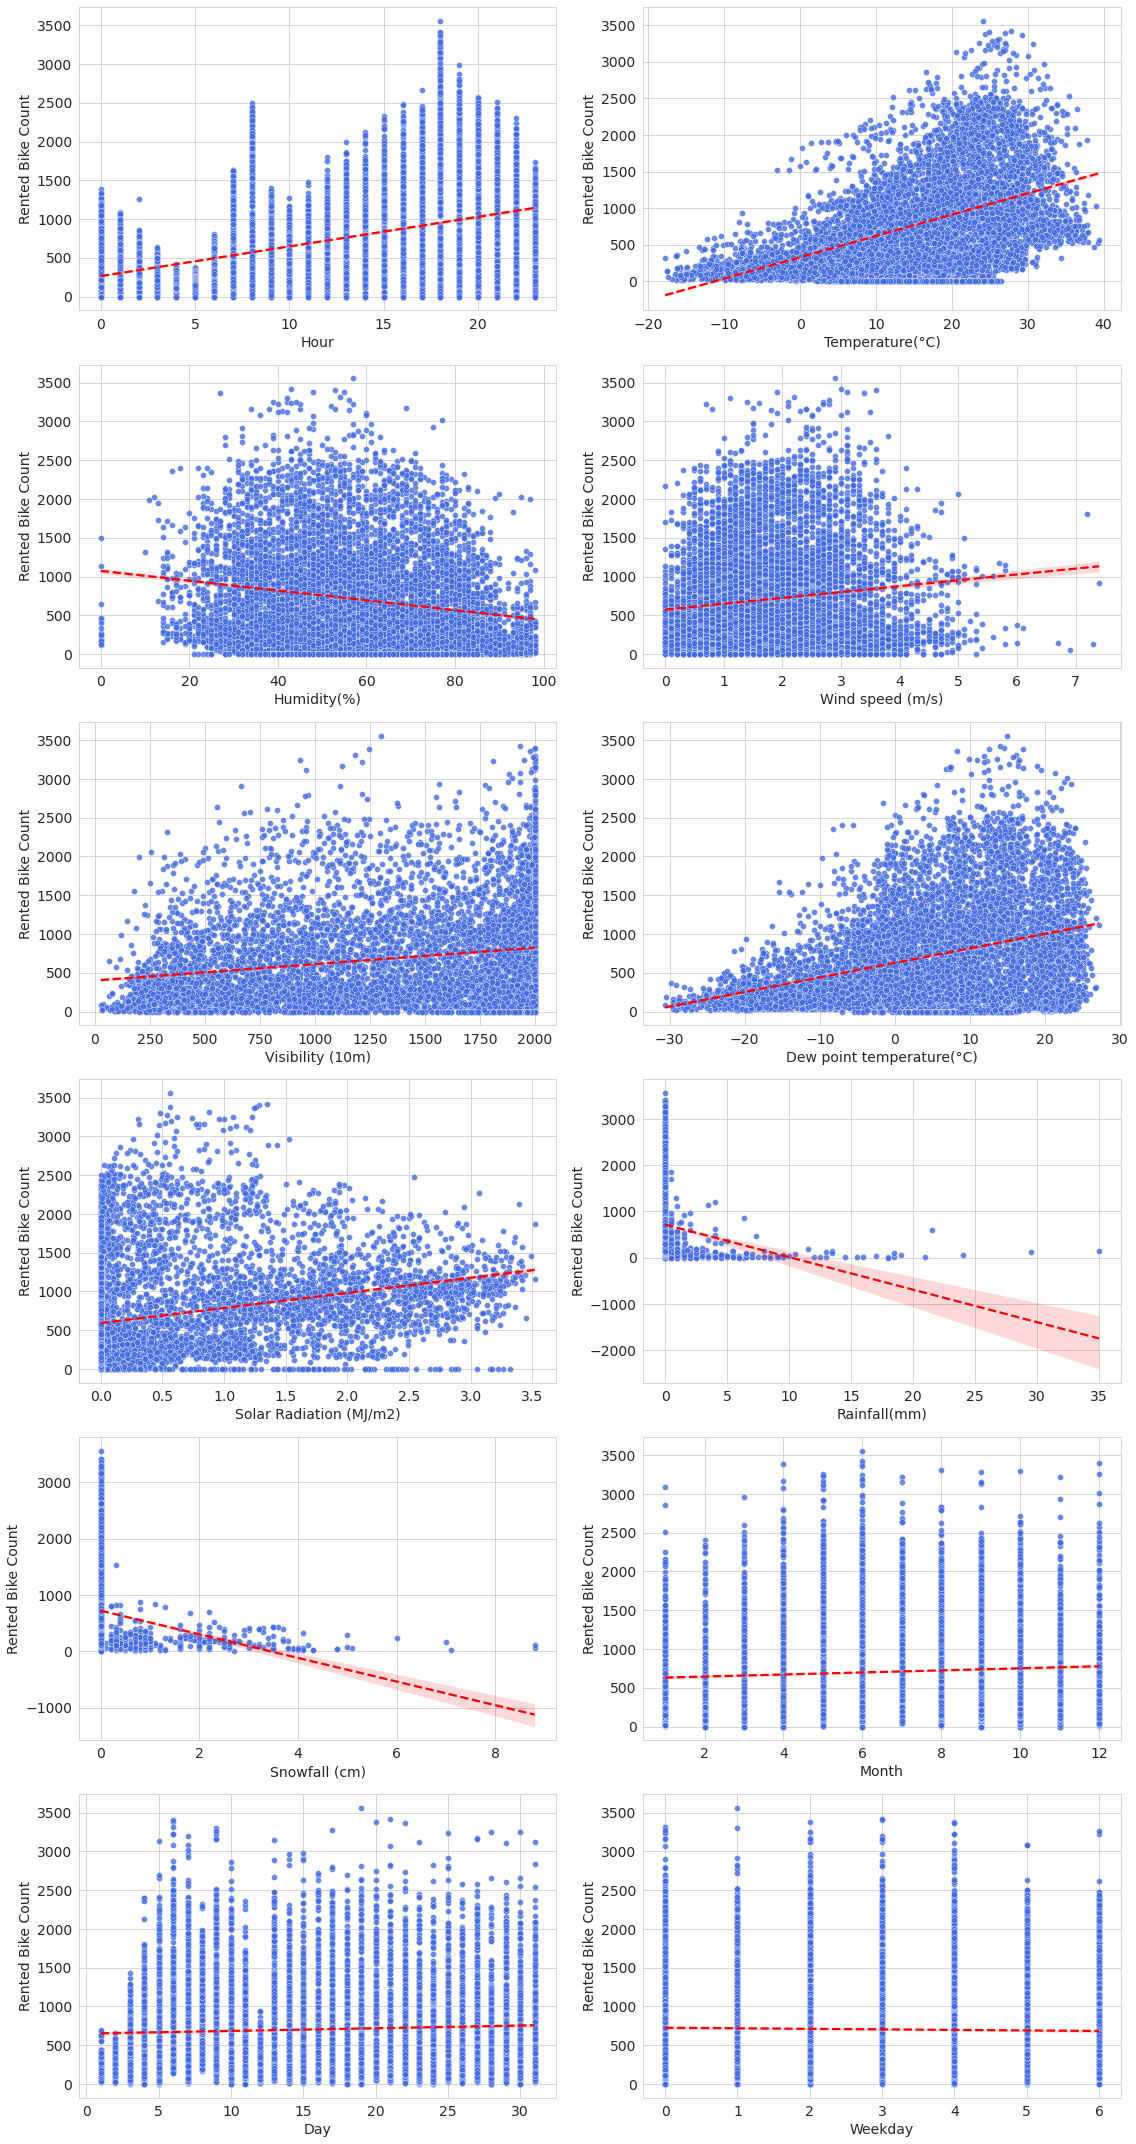

In [48]:
# Creates a blanck canvas
fig, axes = plt.subplots(figsize=(16,30), nrows= 6, ncols= 2)

nums_cols = [col for col in df_nums.columns if col not in ['Rented Bike Count']]

for ind, feature in enumerate(nums_cols):
  ax = axes[ind // 2, ind % 2]
  sns.regplot(data= df, x= feature, y= 'Rented Bike Count', ax= ax, 
              line_kws={"color": "red", 'ls': '--'}, 
              scatter_kws = {'linewidths': 0.4, 'edgecolors': 'white'})

plt.tight_layout();

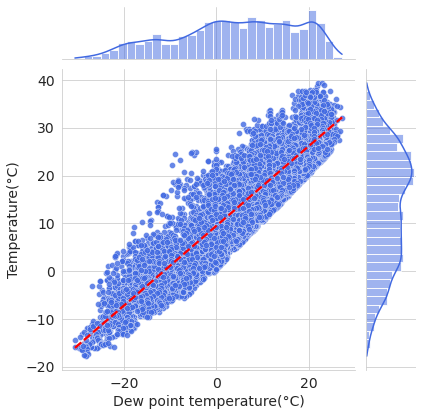

In [47]:
sns.jointplot(data= df, x= 'Dew point temperature(°C)', y= 'Temperature(°C)', kind= 'reg',
              line_kws={"color": "red", 'ls': '--'}, 
              scatter_kws = {'linewidths': 0.4, 'edgecolors': 'white'});

## Prepare the Dataset for Training

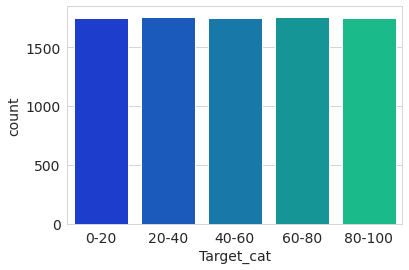

In [28]:

q20, q40, q60, q80 = df_final["Rented Bike Count"].quantile([0.2, 0.4, 0.6, 0.8])

df_final["Target_cat"] = pd.cut(df_final["Rented Bike Count"], bins=[-1., q20, q40, q60, q80, np.inf],
                            labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

sns.countplot(data= df, x= df_final["Target_cat"], palette= 'winter');

In [29]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(df, df_final["Target_cat"]):
  strat_train_set = df_final.loc[train_index]
  strat_test_set = df_final.loc[test_index]

In [30]:
strat_test_set["Target_cat"].value_counts() / len(strat_test_set)

20-40     0.200913
0-20      0.200000
60-80     0.200000
40-60     0.199543
80-100    0.199543
Name: Target_cat, dtype: float64

In [31]:
# train
X_train = strat_train_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_train = strat_train_set['Rented Bike Count']

# test
X_test =  strat_test_set.drop(['Target_cat', 'Rented Bike Count'], axis= 1)
y_test = strat_test_set['Rented Bike Count']

In [32]:
scaler= MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
#  dictionary of models that we are going to use for this dataset
models_dict = {
    "Linear Regression" :           LinearRegression(),
    "Lasso Regression" :            Lasso(),
    "Ridge Regression" :            Ridge(),
    "KNN Regressor":                KNeighborsRegressor(),
    "Decision Tree Regressor" :     DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor" :     RandomForestRegressor(random_state=42),
    "Extra Tree Regressor" :        ExtraTreesRegressor(random_state=42),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(random_state=42),
    "XGB Regressor" :               xgb.XGBRegressor(random_state=42),
    "Light-GBM" :                   lightgbm.LGBMRegressor(random_state=42),
    "LinearSVR" :                   LinearSVR()
}


def model_performance(train_X, test_X, train_y, test_y, models= models_dict):
  """
  return dataframe of each model performance.
  """

  # dictionary that we want to return
  models_data = {
      'Name': [],                   # Name of that model
      'time_taken': [],      # time taken in training, predicting and calulation of errors
      'train_RMSE': [],             # root mean square error of training set
      'train_MAE': [],              # mean square error
      'train_R2_Score': [],         # accuracy of testing set
      'test_RMSE' : [],             # 
      'test_MAE' : [],
      'test_R2_Score' : [],
      'trained_model': []           # trained (fitted) model on training data 
  }

  # models argument in this function is dictionary of ML models with their names 
  for model_name, model_type in models.items():
    
    print(f"We are at {model_name}")

    models_data["Name"].append(model_name)

    # statring time
    tic = time.time() 
  
    # fit on train data
    model_type.fit(train_X, train_y)
    
    models_data['trained_model'].append(model_type)

    # Training set, first perdict then calculate MAE, RMSE, R2_Score 
    train_y_pred = model_type.predict(train_X)
    train_MAE = mean_absolute_error(train_y, train_y_pred)
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_y_pred))
    train_R2_score = r2_score(train_y, train_y_pred)

    models_data["train_MAE"].append(train_MAE)
    models_data["train_RMSE"].append(train_RMSE)
    models_data["train_R2_Score"].append(train_R2_score)

    # Test set
    test_y_pred = model_type.predict(test_X)
    test_MAE = mean_absolute_error(test_y, test_y_pred)
    test_RMSE = np.sqrt(mean_squared_error(test_y, test_y_pred))
    test_R2_score = r2_score(test_y, test_y_pred)

    models_data["test_MAE"].append(test_MAE)
    models_data["test_RMSE"].append(test_RMSE)
    models_data["test_R2_Score"].append(test_R2_score)

    #end time
    tac = time.time()

    models_data["time_taken"].append(tac - tic)

    # loop ended

  return models_data

In [34]:
models_dict = model_performance(scaled_X_train, scaled_X_test, y_train, y_test)

We are at Linear Regression
We are at Lasso Regression
We are at Ridge Regression
We are at KNN Regressor
We are at Decision Tree Regressor
We are at Random Forest Regressor
We are at Extra Tree Regressor
We are at Gradient Boosting Regressor
We are at XGB Regressor
[05:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
We are at Light-GBM
We are at LinearSVR


In [35]:
# creating a dataframe from that dictionary and sort on the basis of test accuracy
performance_df = pd.DataFrame(models_dict).sort_values(by= 'test_R2_Score', ascending= False) 
performance_df

,Name,time_taken,train_RMSE,train_MAE,train_R2_Score,test_RMSE,test_MAE,test_R2_Score,trained_model
9,Light-GBM,0.252422,130.826084,84.692666,0.958671,179.392338,110.631901,0.923651,LGBMRegressor(random_state=42)
6,Extra Tree Regressor,2.116875,0.000000,0.000000,1.000000,183.862776,107.489023,0.919798,"(ExtraTreeRegressor(random_state=1608637542), ..."
5,Random Forest Regressor,3.211941,75.467186,44.948845,0.986248,193.533749,116.063744,0.911139,"(DecisionTreeRegressor(max_features='auto', ra..."
8,XGB Regressor,0.955318,239.219009,160.961810,0.861817,251.098502,167.800208,0.850416,XGBRegressor(random_state=42)
7,Gradient Boosting Regressor,0.894158,242.743459,162.981185,0.857715,255.250614,170.107914,0.845428,([DecisionTreeRegressor(criterion='friedman_ms...
4,Decision Tree Regressor,0.072904,0.000000,0.000000,1.000000,291.761499,161.642466,0.798046,DecisionTreeRegressor(random_state=42)
3,KNN Regressor,1.245377,242.738940,150.240731,0.857720,305.924626,196.795708,0.777963,KNeighborsRegressor()
0,Linear Regression,0.008875,431.043266,323.381406,0.551352,433.485885,321.074847,0.554193,LinearRegression()
2,Ridge Regression,0.005589,431.129841,323.313715,0.551172,433.719462,321.146792,0.553713,Ridge()
1,Lasso Regression,0.010346,433.046028,324.380956,0.547173,436.574666,323.270007,0.547818,Lasso()


# Hyperparam